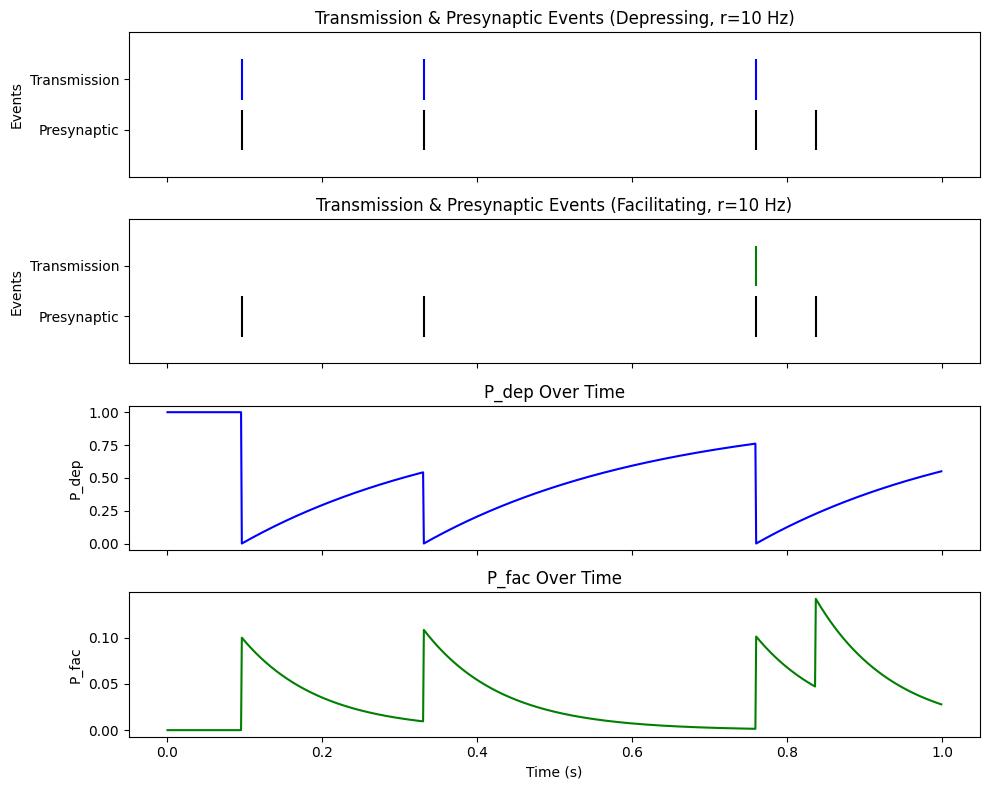

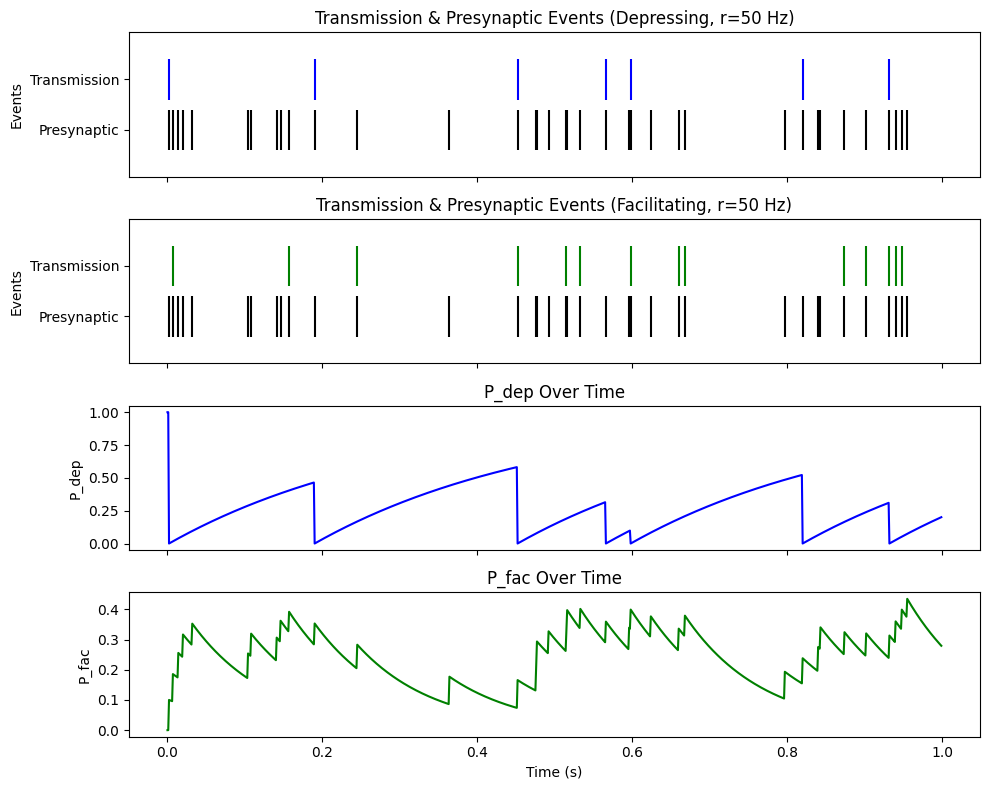

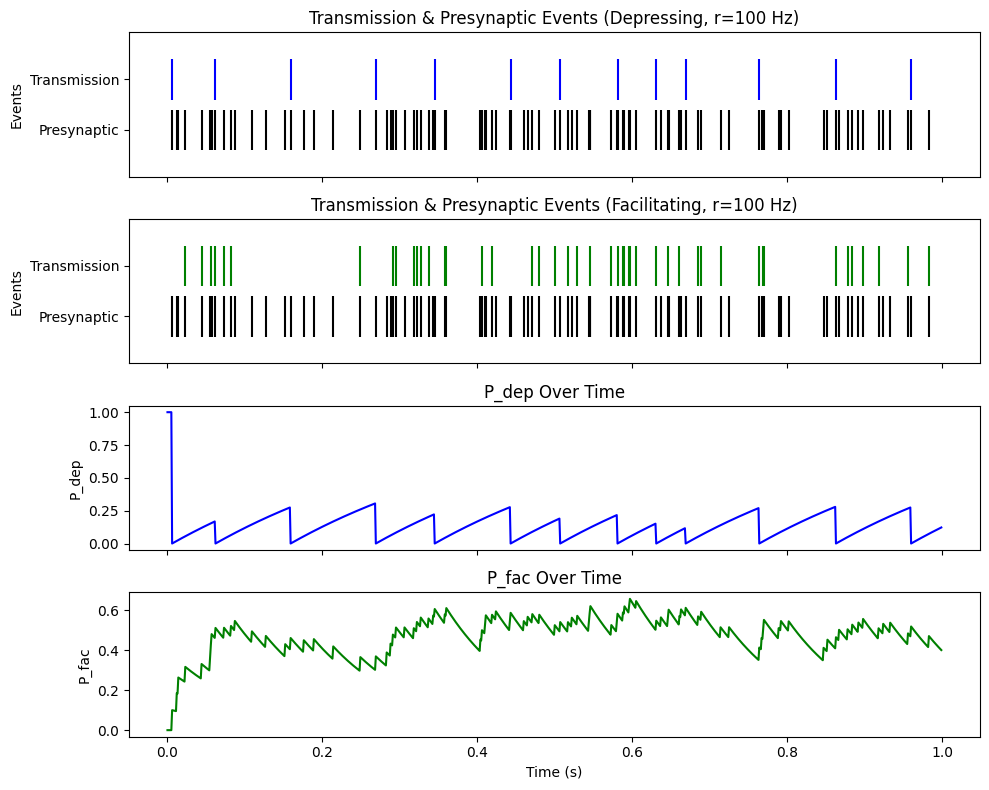

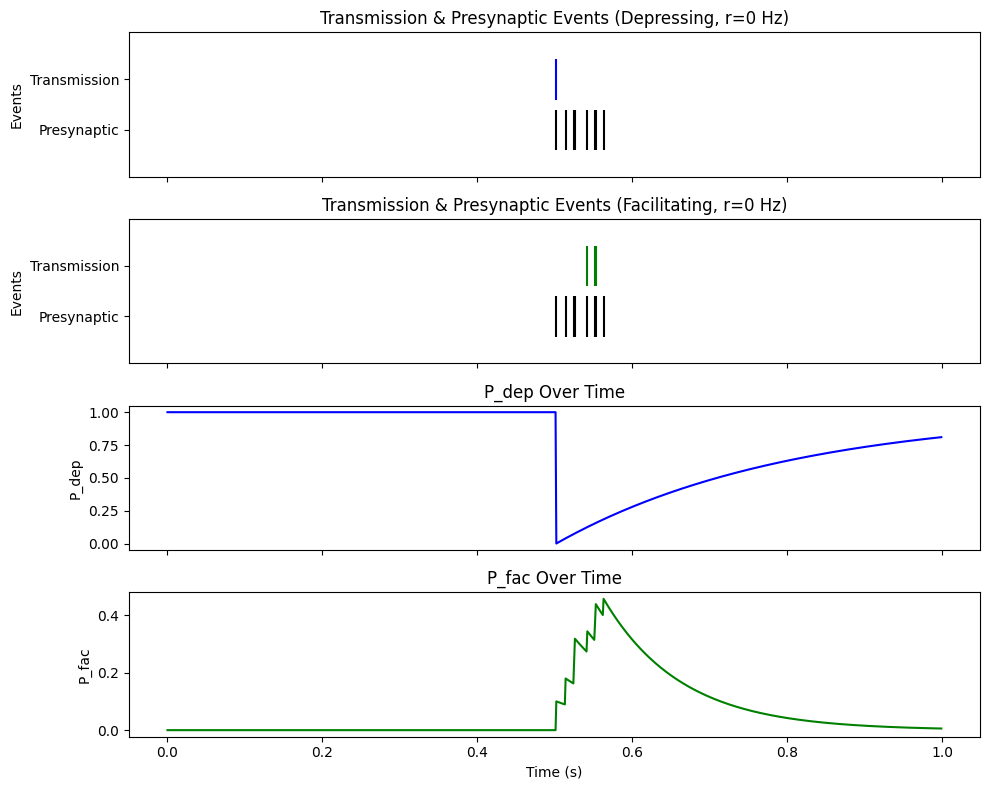

In [74]:

import numpy as np
import matplotlib.pyplot as plt

# Given conditions
P0_dep = 1
P0_fac = 0
tau_p_dep = 0.300  # s
tau_p_fac = 0.100  # s

# Simulation time
dt = 0.001  # s
T_max = 1  # s
t_range = np.arange(0, T_max, dt)

# Spike rate conditions
r_s = [10, 50, 100, 0]  # Hz

# Loop over different spike rate conditions
for r in r_s:
    P_dep = np.empty(len(t_range))
    P_fac = np.empty(len(t_range))
    P_dep[0] = P0_dep
    P_fac[0] = P0_fac
    transmission_dep = []
    transmission_fac = []

    spike_train = np.zeros(len(t_range), dtype=bool)

    if r == 0:
        # Burst at 100 Hz between 0.5 and 0.6 s
        burst_rate = 100  # Hz
        burst_start = 0.5  # s
        burst_end = 0.6  # s
        burst_idxs = (t_range >= burst_start) & (t_range < burst_end)
        burst_spike_train = np.random.rand(np.sum(burst_idxs)) < (burst_rate * dt)
        spike_train[burst_idxs] = burst_spike_train
    else:
        # Regular spike train at rate r
        p_spike = r * dt
        spike_train = np.random.rand(len(t_range)) < p_spike

    # Run simulation
    for i in range(1, len(t_range)):
        # Update P values
        P_dep[i] = P_dep[i - 1] + dt * (P0_dep - P_dep[i - 1]) / tau_p_dep
        P_fac[i] = P_fac[i - 1] + dt * (P0_fac - P_fac[i - 1]) / tau_p_fac

        if spike_train[i]:
            if np.random.rand() < P_dep[i]:
                transmission_dep.append(i)
                P_dep[i] = 0
            P_fac[i] += 0.1 * (1 - P_fac[i])
            if np.random.rand() < P_fac[i]:
                transmission_fac.append(i)

    # Convert indices to time
    transmission_dep_times = np.array(transmission_dep) * dt
    transmission_fac_times = np.array(transmission_fac) * dt
    presyn_times = t_range[spike_train]

    # Plotting
    fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

    axs[0].eventplot([transmission_dep_times, presyn_times], colors=['b', 'k'], lineoffsets=[1, 0], linelengths=[0.8, 0.8])
    axs[0].set_yticks([0, 1])
    axs[0].set_yticklabels(['Presynaptic', 'Transmission'])
    axs[0].set_ylabel('Events')
    axs[0].set_title(f'Transmission & Presynaptic Events (Depressing, r={r} Hz)')

    axs[1].eventplot([transmission_fac_times, presyn_times], colors=['g', 'k'], lineoffsets=[1, 0], linelengths=[0.8, 0.8])
    axs[1].set_yticks([0, 1])
    axs[1].set_yticklabels(['Presynaptic', 'Transmission'])
    axs[1].set_ylabel('Events')
    axs[1].set_title(f'Transmission & Presynaptic Events (Facilitating, r={r} Hz)')

    axs[2].plot(t_range, P_dep, color='b')
    axs[2].set_ylabel('P_dep')
    axs[2].set_title('P_dep Over Time')

    axs[3].plot(t_range, P_fac, color='g')
    axs[3].set_ylabel('P_fac')
    axs[3].set_title('P_fac Over Time')
    axs[3].set_xlabel('Time (s)')

    plt.tight_layout()
    plt.show()

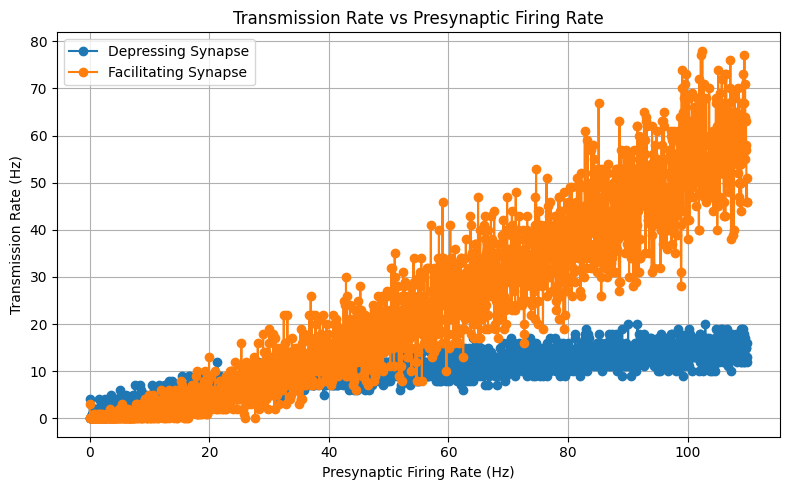

In [76]:
# Firing rates to test
rates = np.arange(0, 110, 0.05)  # 0 to 100 Hz in steps of 10

# Containers for transmission rates
transmission_rate_dep = []
transmission_rate_fac = []

# Run simulation for each firing rate
for r in rates:
    P_dep = np.empty(len(t_range))
    P_fac = np.empty(len(t_range))
    P_dep[0] = P0_dep
    P_fac[0] = P0_fac
    trans_dep = 0
    trans_fac = 0

    spike_train = np.zeros(len(t_range), dtype=bool)

    if r == 0:
        # Add burst at 100 Hz between 0.5 and 0.6 s
        burst_start, burst_end = 0.5, 0.6
        burst_rate = 100
        burst_idxs = (t_range >= burst_start) & (t_range < burst_end)
        burst_spikes = np.random.rand(np.sum(burst_idxs)) < burst_rate * dt
        spike_train[burst_idxs] = burst_spikes
    else:
        # Poisson spike train
        spike_train = np.random.rand(len(t_range)) < r * dt

    for i in range(1, len(t_range)):
        # Update probabilities
        P_dep[i] = P_dep[i - 1] + dt * (P0_dep - P_dep[i - 1]) / tau_p_dep
        P_fac[i] = P_fac[i - 1] + dt * (P0_fac - P_fac[i - 1]) / tau_p_fac

        if spike_train[i]:
            # Depressing synapse
            if np.random.rand() < P_dep[i]:
                trans_dep += 1
                P_dep[i] = 0

            # Facilitating synapse
            P_fac[i] += 0.1 * (1 - P_fac[i])
            if np.random.rand() < P_fac[i]:
                trans_fac += 1

    # Compute transmission rate
    duration = T_max
    transmission_rate_dep.append(trans_dep / duration)
    transmission_rate_fac.append(trans_fac / duration)

# Plotting transmission rate vs firing rate
plt.figure(figsize=(8, 5))
plt.plot(rates, transmission_rate_dep, label='Depressing Synapse', marker='o')
plt.plot(rates, transmission_rate_fac, label='Facilitating Synapse', marker='o')
plt.xlabel('Presynaptic Firing Rate (Hz)')
plt.ylabel('Transmission Rate (Hz)')
plt.title('Transmission Rate vs Presynaptic Firing Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()